## Tesseract OCR
Install Tesseract

테서랙트(Tesseract)는 다양한 운영 체제를 위한 광학 문자 인식 엔진입니다. 이 소프트웨어는 Apache License, 버전 2.0에 따라 배포되는 무료 소프트웨어이며 2006년부터 Google에서 개발을 후원했습니다. Tesseract는 1995년 문자 정확도 측면에서 3대 OCR 엔진에 속했으며 Linux, Windows 및 Mac OS X에서 사용할 수 있습니다.

Install PyTesseract

Tesseract OCR 엔진 설치가 완료되었고, OCR, 컴퓨터 비전 및 이미지 처리를 수행하는 데 필요한 필수 Python 패키지를 설치합니다.

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract -q

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,659 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!tesseract --version

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX512BW
 Found AVX512F
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


### install language (언어 설치)

Ex) Kor

```sudo apt-get install tesseract-ocr-kor```

EX) All languages

```sudo apt-get install tesseract-ocr-all```

In [2]:
!sudo apt-get install tesseract-ocr-kor tesseract-ocr-jpn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-jpn tesseract-ocr-kor
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,442 kB of archives.
After this operation, 4,179 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-jpn all 1:4.00~git30-7274cfa-1.1 [1,390 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-kor all 1:4.00~git30-7274cfa-1.1 [1,052 kB]
Fetched 2,442 kB in 2s (1,005 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling ba

In [ ]:
!tesseract --list-langs

List of available languages (4):
eng
jpn
kor
osd


In [ ]:
!pip install opencv-python

In [3]:
import pytesseract
import cv2
import os
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

숫자

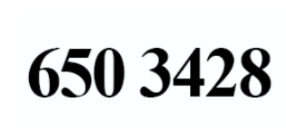

In [ ]:
#이미지를 불러와 gray 스케일로 변환해 준다.

image = cv2.imread('/content/drive/MyDrive/kdt_231026/m8_vision/ocr/ocr_number.png')
cv2_imshow(image)

In [ ]:
#이미지를 불러와 gray 스케일로 변환해 준다.

image = cv2.imread('/content/drive/MyDrive/kdt_231026/m8_vision/ocr/ocr_number.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#pytesseract에서는 numpy array를 읽지 못하고 file을 읽기 때문에 os로 파일을 불러들여야 한다.
filename = "{}.jpg".format(os.getpid())
cv2.imwrite(filename, gray)

#pytesseract의 image to string을 써준다.
#숫자니까 lang = 'None'으로

text = pytesseract.image_to_string(Image.open(filename), lang = None)
os.remove(filename)

print(text)


650 3428



영문 텍스트

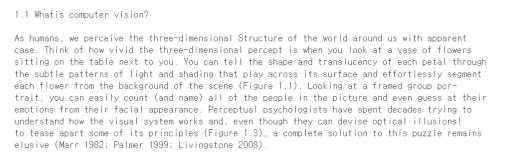

In [ ]:
# 이미지 파일 경로
filename = '/content/drive/MyDrive/kdt_231026/m8_vision/ocr/ocr_text.png'

# 이미지 로드
image = Image.open(filename)

# 이미지 출력
plt.imshow(image)
plt.axis('off') # 축 표시 제거
plt.show()

Q. 영문 텍스트 이미지를 텍스트로 변환하세요.

In [ ]:
filename = '/content/drive/MyDrive/kdt_231026/m8_vision/ocr/ocr_text.png'
extractedInformation = pytesseract.image_to_string(Image.open(filename))
print(extractedInformation)

1.1 Whatis computer vision?

As humans, we perceive the three-dimensional Structure of the world around us with apparent
case. Think of how vivid the three-dimensional percept is when you look at a vase of flowers
sitting on the table next to you. You can tell the shape and translucency of each petal through
the subtle patterns of light and shading that play across its surface and effortlessly segment
each flower from the background of the scene (Figure 1.1). Looking at a framed group por-
trait, you can easily count (and name) all of the people in the picture and even guess at their
emotions from their facial appearance. Perceptual psychologists have spent decades trying to
understand how the visual system works and, even though they can devise optical illusions

to tease apart some of its principles (Figure 1.3), a complete solution to this puzzle remains
elusive (Marr 1982; Palmer 1999; Livingstone 2008)



이미지 불러오는 다양한 방법

requests를 이용하여 읽어와서 cv2_imshow로 출력

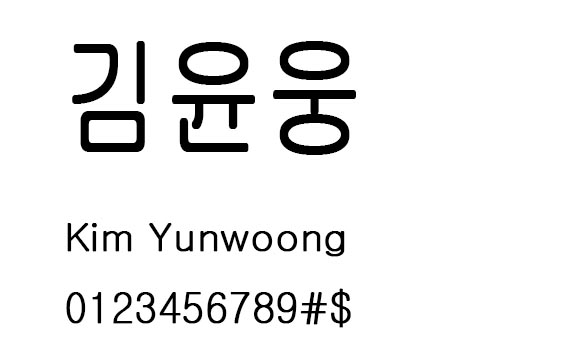

In [ ]:
import requests
import numpy as np

url = 'https://user-images.githubusercontent.com/69428232/148318703-ef6bd43f-ec4f-42f5-a336-3b584a662982.jpg'

image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8) # bytearray 가져온 컨텐츠를 바이트 배열로 변환
org_image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)
cv2_imshow(org_image)

Q. requests를 이용하여 읽어와서 matplotlib으로 출력

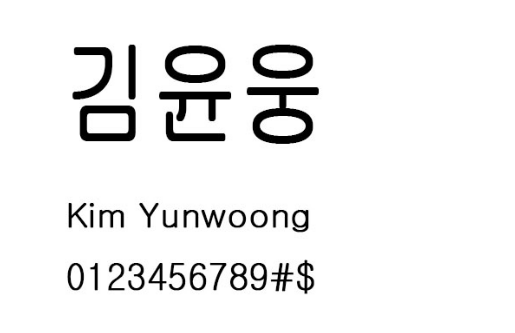

In [ ]:
import requests
from PIL import Image
from io import BytesIO

# 이미지 파일 경로
url = 'https://user-images.githubusercontent.com/69428232/148318703-ef6bd43f-ec4f-42f5-a336-3b584a662982.jpg'

response = requests.get(url)
image = Image.open(BytesIO(response.content))

plt.imshow(image)
plt.axis('off') # 축 표시 제거
plt.show()

Q. imageio를 이용하여 이미지를 읽어와서 cv2_imshow를 이용하여 출력

- OpenCV는 기본적으로 BGR 색상 체계를 사용. imageio.imread로 읽은 이미지는 RGB 색상 체계를 사용하므로, OpenCV에서 처리하기 전에 BGR로 변환하는 것이 일반적인 관행.
- OCR 처리를 위해서는 추가적으로 그레이스케일로 변환하는 것이 좋으며, 이는 cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)를 사용하여 수행할 수 있다.
- OCR을 위한 최적의 성능을 원한다면, BGR에서 그레이스케일로의 변환 단계를 추가하는 것이 좋다.

<ipython-input-20-0d86c61e24a9>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(url)


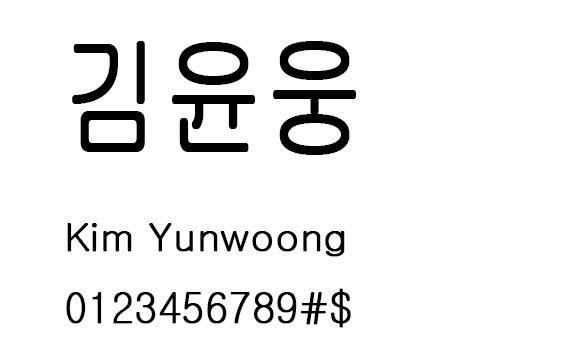

In [ ]:
import imageio

url = 'https://user-images.githubusercontent.com/69428232/148318703-ef6bd43f-ec4f-42f5-a336-3b584a662982.jpg'
img = imageio.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

Q. imageio를 이용하여 이미지를 읽어와서 matplotlib을 이용하여 출력

<ipython-input-11-0741c765d387>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(url)


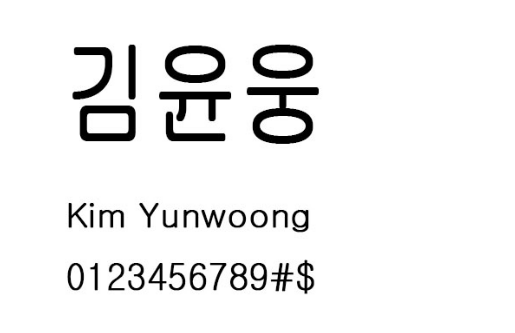

In [ ]:
# 이미지 URL
url = 'https://user-images.githubusercontent.com/69428232/148318703-ef6bd43f-ec4f-42f5-a336-3b584a662982.jpg'
img = imageio.imread(url)
plt.imshow(img)
plt.axis('off')
plt.show()

## 테스트 하려는 이미지는 한글, 영어, 숫자가 혼합된 이미지

<ipython-input-21-454d5ad237b8>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(url)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
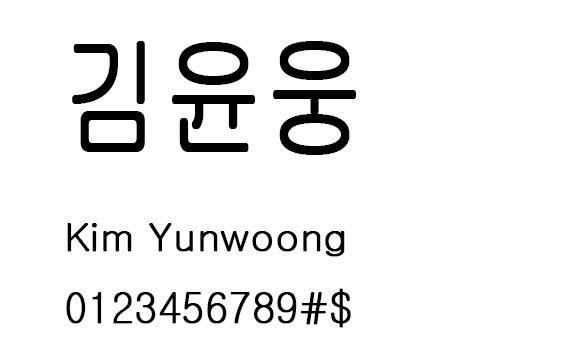

In [ ]:
import imageio


url = 'https://user-images.githubusercontent.com/69428232/148318703-ef6bd43f-ec4f-42f5-a336-3b584a662982.jpg'

img = imageio.imread(url)
image = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image

In [ ]:
text = pytesseract.image_to_string(image, lang='kor+eng')
print(text)

김윤웅

Kim Yunwoong

0123456789#$



## 다양한 음영과 노이즈가 존재하는 경우

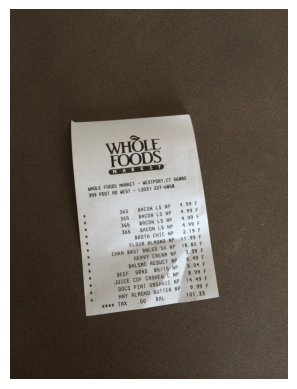

In [ ]:
import requests
from io import BytesIO

# 이미지 파일 경로
url = 'https://user-images.githubusercontent.com/69428232/148330274-237d9b23-4a79-4416-8ef1-bb7b2b52edc4.jpg'

# URL에서 이미지 가져오기
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# 이미지 출력
plt.imshow(image)
plt.axis('off') # 축 표시 제거
plt.show()

In [ ]:
text = pytesseract.image_to_string(image, lang='eng')
print(text)

RT,CT 06880

WHOLE FOODS MARKET ~ WESTPO
7-6858

399 POST RD WEST ~ (203) 22

36% BACON LS NP

BACON LS NP
BACON LS NP

 



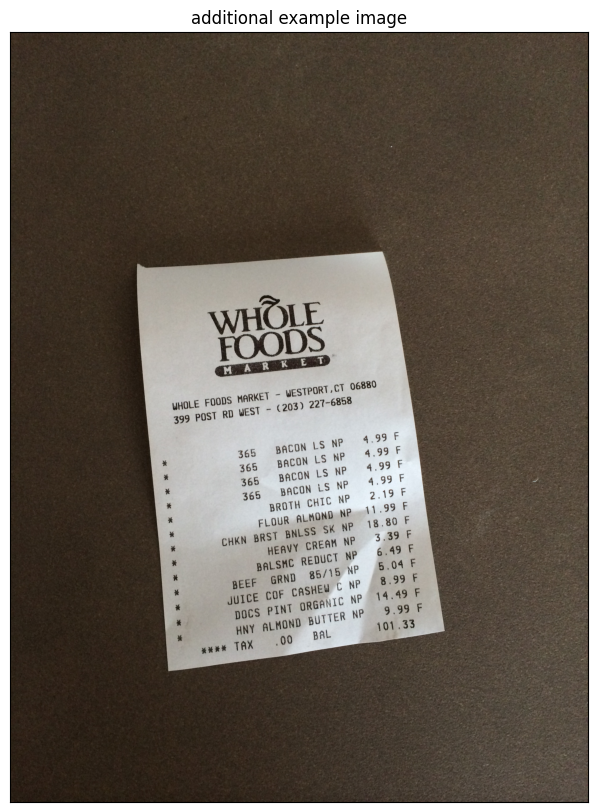

In [ ]:
import numpy as np

url = 'https://user-images.githubusercontent.com/69428232/148330274-237d9b23-4a79-4416-8ef1-bb7b2b52edc4.jpg'

image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
org_image2 = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)
rgb_image2 = cv2.cvtColor(org_image2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 10))

plt.subplot(1, 1, 1)
plt.imshow(rgb_image2)
plt.title('additional example image')
plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
text = pytesseract.image_to_string(rgb_image2, lang='eng')
print(text)

y - wesTPoRT,CT 06880

yHOLE FOODS NARKE
399 post RD WEST ~ ;

903) 227-6858

pAcoN LS NP
pacon LS N

BACON LS NP
pacon tS N

365

 



## 입력된 이미지를 전처리 과정을 통해 Scan한 이미지로 변경하여 OCR을 수행


In [4]:
from imutils.perspective import four_point_transform # 이미지에서 특정 영역을 직사각형으로 변환하는 데 사용
import imutils # 이미지 처리를 단순화하고 코드를 더 간결하게 만드는 데 사용
import re
import requests

In [5]:
# 제목(title), 이미지(img), 그리고 이미지를 표시할 때 사용할 그림 크기(figsize)를 매개변수로 받는다.
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else: # 매개변수가 리스트가 아닌 경우
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

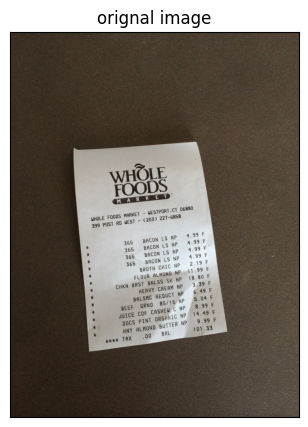

In [ ]:
url = 'https://user-images.githubusercontent.com/69428232/148330274-237d9b23-4a79-4416-8ef1-bb7b2b52edc4.jpg'

image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
org_image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)

plt_imshow("orignal image", org_image)

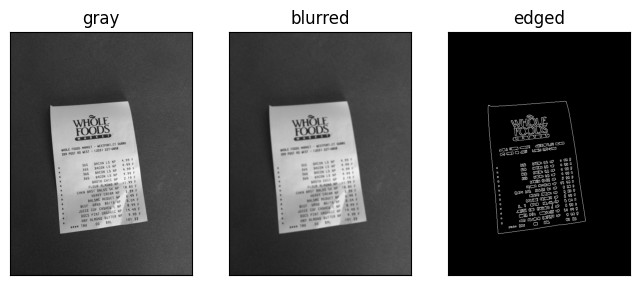

In [ ]:
image = org_image.copy()
image = imutils.resize(image, width=500)
ratio = org_image.shape[1] / float(image.shape[1])

# 이미지를 grayscale로 변환하고 blur를 적용
# 모서리를 찾기위한 이미지 연산
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5,), 0) # 그레이스케일 이미지에 가우시안 블러(Gaussian Blur)를 적용하여 이미지를 부드럽게 만듭니다.
# 캐니 가장자리 검출은 이미지에서 엣지를 감지, 이중 임계값을 사용하여 강한 엣지, 약한 엣지 및 노이즈로 분류. 75: 최소 임계값. 200: 최대 임계값
edged = cv2.Canny(blurred, 75, 200)

plt_imshow(['gray', 'blurred', 'edged'], [gray, blurred, edged])

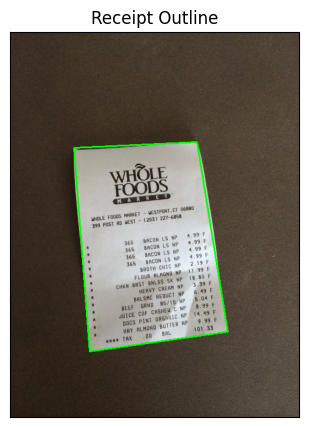

In [ ]:
# 캐니 가장자리 검출을 통해 찾은 가장자리의 윤곽을 검출
# 함수는 이미지에서 윤곽을 찾아 리스트로 반환
# RETR_EXTERNAL 플래그를 사용하여 가장 바깥쪽 윤곽만 검출하고, CHAIN_APPROX_SIMPLE 플래그를 사용하여 윤곽을 간단한 방법으로 압축
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts) # OpenCV의 버전에 따라 반환되는 값의 차이를 처리. 이 함수를 사용하면 윤곽을 안전하게 추출
cnts = sorted(cnts, key=cv2.contourArea, reverse=True) # 윤곽을 크기순으로 정렬

receiptCnt = None # 영수증 윤곽을 저장할 변수를 초기화

# 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
for c in cnts:
	peri = cv2.arcLength(c, True) # 윤곽의 둘레를 계산
	approx = cv2.approxPolyDP(c, 0.02 * peri, True) # 윤곽을 단순화. 0.02 * peri는 근사화 정확도를 조절하는 파라미터

	# contours가 크기순으로 정렬되어 있기때문에 제일 첫번째 사각형을 영수증 영역으로 판단하고 break
	if len(approx) == 4:
		receiptCnt = approx # 영수증 윤곽을 저장
		break


# 만약 추출한 윤곽이 없을 경우 오류
if receiptCnt is None:
	raise Exception(("Could not find receipt outline."))

output = image.copy()
cv2.drawContours(output, [receiptCnt], -1, (0, 255, 0), 2) # 이미지에 윤곽을 그리는 함수. -1로 설정하면 모든 윤곽을 그린다.
plt_imshow("Receipt Outline", output)

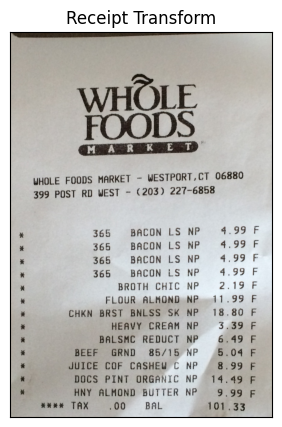

In [ ]:
# 원본 이미지에 찾은 윤곽을 기준으로 이미지를 보정
receipt = four_point_transform(org_image, receiptCnt.reshape(4, 2) * ratio) # 원본 이미지에서 영수증 영역을 추출하고 변환
plt_imshow("Receipt Transform", receipt)

In [ ]:
options = "--psm 4" # Tesseract에게 이미지가 변수 크기의 텍스트를 포함하는 단일 열로 구성되어 있음을 알려주는 모드
text = pytesseract.image_to_string(cv2.cvtColor(receipt, cv2.COLOR_BGR2GRAY), config=options)

# OCR결과 출력
print("[INFO] OCR결과:")
print("==================")
print(text)
print("\n")

[INFO] OCR결과:
 

WHOLE
FOODS
CE eam»

WHOLE FOODS MARKET - WESTPORT, CT 06880
399 POST RD WEST - (203) 227-6858

365 BACON LS NP 4.99

365 BACON LS NP 4.99

365 BACON LS NP 4.99

365  BACONLS NP 4.99
BROTH CHIC NP 2.19

FLOUR ALMOND NP.11.99

CHKN BRST BNLSS SK NP 18.80
HEAVY CREAM NP 3.39

BALSMC REDUCT NP 6.49

BEEF GRND 85/15 NP 5.04
JUICE COF CASHEW C NP 8.99
DOCS PINT ORGANIC NP 14.49
HNY ALMOND BUTTER NP 9.99
wee TAX 100 BAL 101.33





Q.  입력된 이미지를 전처리 과정을 통해 Scan한 이미지로 변경하는 과정을 모두 포함하는 사용자 함수 run_tesseract_ocr를 작성 하세요.

In [8]:
def run_tesseract_ocr(image, width, ksize=(5,5), min_threshold=75, max_threshold=200, lang='eng'):
  image_list_title = []
  image_list = []

  image = imutils.resize(image, width=width)
  ratio = org_image.shape[1] / float(image.shape[1])

  # 이미지를 grayscale로 변환하고 blur를 적용
  # 모서리를 찾기위한 이미지 연산
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, ksize, 0)
  edged = cv2.Canny(blurred, min_threshold, max_threshold)

  image_list_title = ['gray', 'blurred', 'edged']
  image_list = [gray, blurred, edged]

  # contours를 찾아 크기순으로 정렬
  cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

  receiptCnt = None

  # 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
  for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # contours가 크기순으로 정렬되어 있기때문에 제일 첫번째 사각형을 영수증 영역으로 판단하고 break
    if len(approx) == 4:
      receiptCnt = approx
      break


  # 만약 추출한 윤곽이 없을 경우 오류
  if receiptCnt is None:
    raise Exception(("Could not find receipt outline."))


  output = image.copy()
  cv2.drawContours(output, [receiptCnt], -1, (0, 255, 0), 2)

  image_list_title.append("Receipt Outline")
  image_list.append(output)

  # 원본 이미지에 찾은 윤곽을 기준으로 이미지를 보정
  receipt = four_point_transform(org_image, receiptCnt.reshape(4, 2) * ratio)

  plt_imshow(image_list_title, image_list)
  plt_imshow("Receipt Transform", receipt)

  options = "--psm 4" # --psm 4는 '단일 블록' 세그멘테이션 모드로 이미지에 있는 모든 텍스트를 하나의 블록으로 처리.

  text = pytesseract.image_to_string(cv2.cvtColor(receipt, cv2.COLOR_BGR2RGB), lang=lang, config=options)

  # OCR결과 출력
  print("[INFO] OCR결과:")
  print("==================")
  print(text)

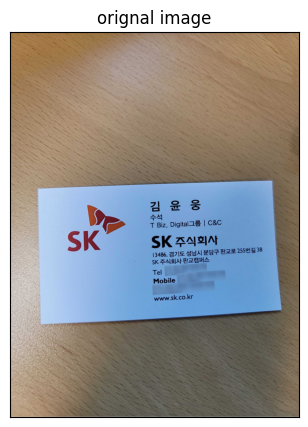

In [7]:
import numpy as np

url = 'https://user-images.githubusercontent.com/69428232/155486780-55525c3c-8f5f-4313-8590-dd69d4ce4111.jpg'

image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
org_image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)

plt_imshow("orignal image", org_image)

Q. run_tesseract_ocr 사용자 함수를 활용하여 명함 이미지를 텍스트로 변환하세요.

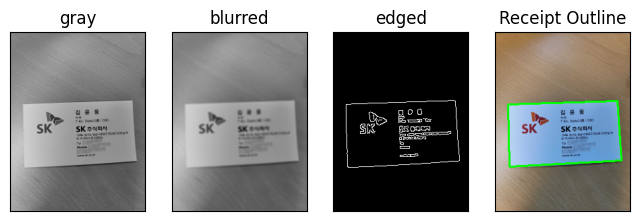

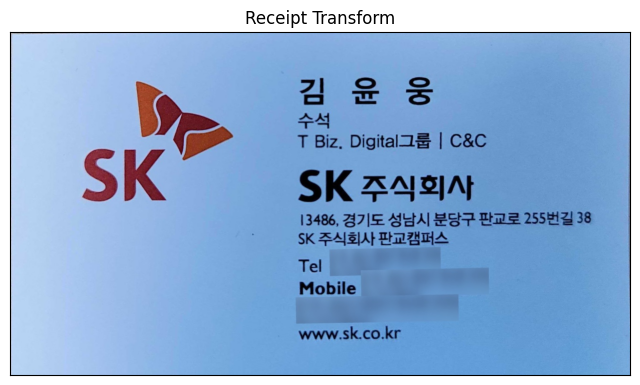

[INFO] OCR결과:
oS  oS
김 윤 웅
수석
T Biz. Digital | C&C

$《 주식회사

13486, 경기도 성남시 분당구 판교로 255번길 38
< 주식회사 판교캠퍼스

Tel
Mobile

www.sk.co.kr



In [9]:
run_tesseract_ocr(org_image, width=200, ksize=(5, 5), min_threshold=20, max_threshold=100, lang='kor+eng')